# Lending Club Case Study

### Group Facilitator
  Kumar Krishna Chakraborty

### Business Problem Statement

A consumer finance company is specialised in lending various types of loans to urban customers.When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
-  If the applicant is likely to repay the loan, then   approving the loan results in a loss of business to the company.
-   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company 

### Business Objective
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment 

### Solution Approach
We will use Exploratory Data Analysis to identify the key consumer and loan attributes that influence the tendency of loan default. 

We import the necessary python libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
%matplotlib inline
warnings.filterwarnings('ignore')

### Overview Of Data

In [2]:
#We have placed the csv loan data file inside the same parent folder
loan= pd.read_csv(r'loan.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
# We explore the data by reading the top rows. .
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


We try to capture a brief summary of the data

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.shape

(39717, 111)

### Data Cleanup

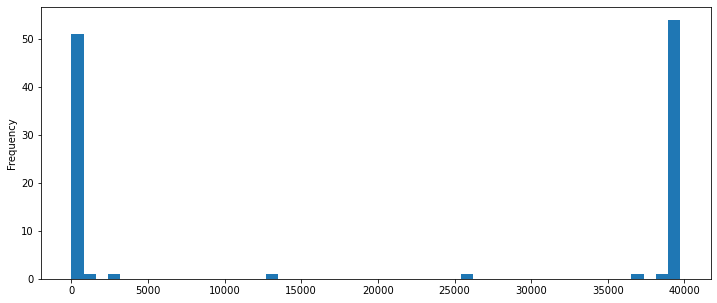

In [6]:
#we find some columns have missing values.Hence we analyze it to decide whether to keep them or drop them
#We will perform cleanup of NULLs from rows and columns associated with the loan dataframe
cs = loan.isnull().sum()
cs.plot(kind='hist', bins=50, figsize = (12,5))
plt.show()

In the histogram above, X-axis represents number og NULL valus and Y-axis represents the number of columns. We observe a spike near 40000 mark. The total number records in our datast is 39717. We want to drop columns having all NULL values.  

In [7]:
cs.loc[(cs.values > 10000) & (cs.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

We will drop all columns having more than 10000 NULL values

In [8]:
loan.drop(columns=list(cs[cs.values > 10000].index), inplace=True)
loan.shape

(39717, 53)

We will check if there are columns with single value in them

In [9]:
u_column = loan.nunique()
print(u_column)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

We will drop the columns with single values as they are not required for  analysis

In [10]:
col1 = u_column[u_column.values == 1]
col1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

We are dropping the columns

In [11]:
loan.drop(columns = list(col1.index), inplace=True)
loan.shape

(39717, 44)

Now we have only 44 cloumns (Initial dataset contained 111 columns)

The columns containing data that are derived after loan approval are irrelevant for our current analysis. So we will drop them. Also columns line id, member_id, url etc which uniquely identify the loan application are also irrelevant. Hence we will drop them also. The zip_code contains partial data that can affect our analysis. So we are dropping it.

In [12]:
delete_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan.drop(columns=delete_cols, inplace=True)
loan.shape

(39717, 28)

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [14]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


### Data Preparation

We analyze the loan_status colums

In [15]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

loan_status with value "Current" doesnt give any information  regarding analysis for approving or rejecting application. Hence dropping this data.

In [16]:
loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 28)

Now we look at term column

In [17]:
loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

We look at int_rate

In [18]:
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

We will remove the percentage symbol

In [19]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

We do a box plot to indentify outliers

<AxesSubplot:>

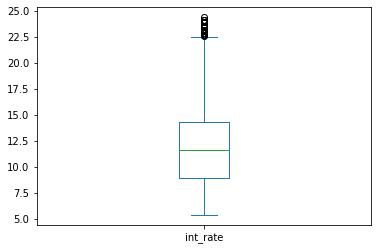

In [20]:
loan['int_rate'].plot.box()

We find Outliers which we will analyze during Univariate analysis

We analyze grade column

In [21]:
loan['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

We analyze sub_grade column

In [22]:
loan['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

We analyze emp_title column

In [23]:
print(loan['emp_title'].value_counts().head())
print(loan['emp_title'].unique().shape)

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: emp_title, dtype: int64
(28028,)


We analyze emp_length column

In [24]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [25]:
loan['emp_length'].isnull().sum()

1033

We analyze home_ownership column

In [26]:
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

We analyze verification_status column

In [27]:
loan['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

We analyze issue_d column

In [28]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

We will segregate the month and year

In [29]:
mn, yr = loan['issue_d'].str.split('-').str

In [30]:
yr.value_counts()

11    20516
10    11532
09     4716
08     1562
07      251
Name: issue_d, dtype: int64

In [31]:
mn.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_d, dtype: int64

We will drop the issue_d column and create two new columns for year and month

In [32]:
loan['issue_y'] = pd.to_numeric(yr)
loan['issue_m'] = mn
loan.drop(columns=['issue_d'], inplace=True)

In [33]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,issue_m
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Jan-85,1,3,0,13648,83.70%,9,0.0,11,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Apr-99,5,3,0,1687,9.40%,4,0.0,11,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Nov-01,2,2,0,2956,98.50%,10,0.0,11,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Feb-96,1,10,0,5598,21%,37,0.0,11,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Nov-04,3,9,0,7963,28.30%,12,0.0,11,Dec


We analyze the purpose column

In [34]:
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

We analyze the title column

In [35]:
len(loan['title'].value_counts())

19297

In [36]:
loan['title'].head(10)

0                                  Computer
1                                      bike
2                      real estate business
3                                  personel
5     My wedding loan I promise to pay back
6                                      Loan
7                           Car Downpayment
8      Expand Business & Buy Debt Portfolio
9               Building my credit history.
10               High intrest Consolidation
Name: title, dtype: object

In [37]:
loan['title'].sample(10)

16965                       Property Investment
121                               CONSOLIDATION
15794                          Home Improvement
37548    Consolidating high APR/interest credit
27749                                     HALAT
1545                    Debt Consolidation Loan
32854                      car loan refinancing
30075                       personal investment
31872                        debt consolidation
38412                             Consolidation
Name: title, dtype: object

title column contain lot of unique values. Hence it is irrelevant for analysis and we are dropping it

In [38]:
loan.drop(columns=['title'], inplace=True)

We analyze the addr_state column

In [39]:
loan['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

We analyze earliest_cr_line column

In [40]:
loan['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [41]:
m, y = loan['earliest_cr_line'].str.split('-').str
y.value_counts()

00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: earliest_cr_line, dtype: int64

We observe data format inconsistencies. Sometimes it has MMM-YY and at other times it has YY-MMM. Also, the year is a 2 digit and not Y2K corrected. Hence we need to correct the data

In [42]:
from datetime import datetime
today = datetime.today()
today.year

2023

In [43]:
def days_from_earliest_cr_line (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days
days_from_earliest_cr_line("Dec-21")

406

In [44]:
loan['days_from_earliest_cr_line'] = loan['earliest_cr_line'].apply(days_from_earliest_cr_line)
loan['days_from_earliest_cr_line'].describe()

count    38577.000000
mean      9471.981647
std       2491.854695
min       5184.000000
25%       7802.000000
50%       9021.000000
75%      10633.000000
max      28134.000000
Name: days_from_earliest_cr_line, dtype: float64

We drop the column earliest_cr_line

In [45]:
loan.drop(columns=['earliest_cr_line'], inplace=True)

We analyze the olumn revol_util

In [46]:
loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

We remove the percentage

In [47]:
loan['revol_util'] = pd.Series(loan['revol_util']).str.replace('%', '').astype(float)
loan['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [48]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38577 non-null  int64  
 1   funded_amnt                 38577 non-null  int64  
 2   funded_amnt_inv             38577 non-null  float64
 3   term                        38577 non-null  object 
 4   int_rate                    38577 non-null  float64
 5   installment                 38577 non-null  float64
 6   grade                       38577 non-null  object 
 7   sub_grade                   38577 non-null  object 
 8   emp_title                   36191 non-null  object 
 9   emp_length                  37544 non-null  object 
 10  home_ownership              38577 non-null  object 
 11  annual_inc                  38577 non-null  float64
 12  verification_status         38577 non-null  object 
 13  loan_status                 385

We calculate the percentage of loans paid vs charged off for all the records 

In [49]:
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

### Exploratory Data Analysis

#### Univariate Analysis

We will analyze the correlation between the different numeric attributes and see if they are correlated (with high correlation value)

In [50]:
# Creating new loan_status_num numeric attribute. We assign 1 for defaulted loans and 0 for paid off 
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [51]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,issue_m,days_from_earliest_cr_line,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,3,0,13648,83.7,9,0.0,11,Dec,13889,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,3,0,1687,9.4,4,0.0,11,Dec,8686,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,2,0,2956,98.5,10,0.0,11,Dec,7741,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10,0,5598,21.0,37,0.0,11,Dec,9841,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,9,0,7963,28.3,12,0.0,11,Dec,6645,0


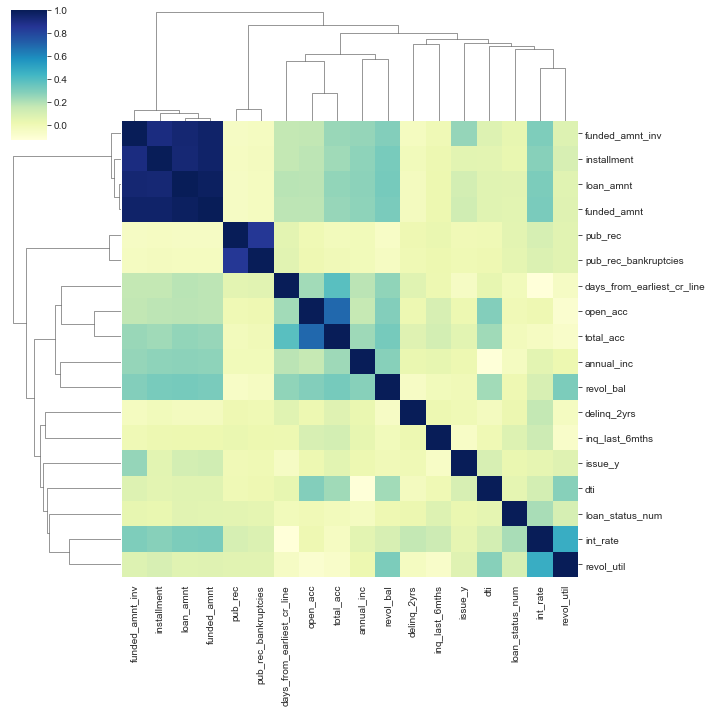

In [52]:
sns.set_style("whitegrid")
sns.clustermap(data=loan.corr(), cmap='YlGnBu', figsize=(10,10))
plt.show()

As darker shades indicate heigher correlation , we infer that loan_amnt, funded_amnt, funded_amnt_inv and installment have huge correlation These fields are proportional to each other. Also the public records related fields pub_rec, pub_rec_bankrupcies and number of accounts related fields open_acc & total_acc are correlated.

We will compare the loan_status with all the numeric variables

In [53]:
# we set the color style
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']


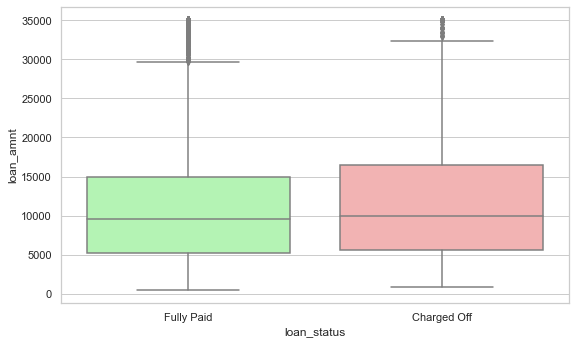

In [54]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [55]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

We observe drastic difference between mean and median. We limit our data to 75%

In [56]:
loan_t75 = loan.loc[(loan['loan_amnt']<=15000)]

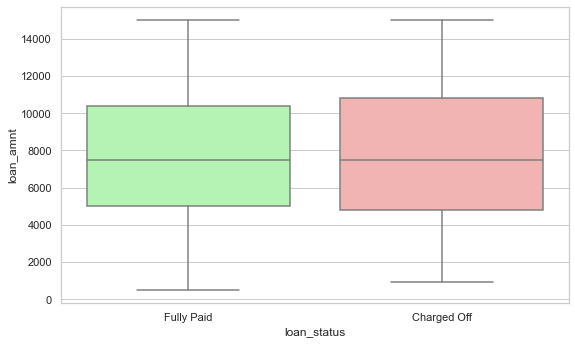

In [57]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_t75)
plt.show()

We consider loan data above 75% 

In [58]:
loan_a75 = loan.loc[(loan['loan_amnt']>=15000)]
loan_a75.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_y,issue_m,days_from_earliest_cr_line,loan_status_num
20,20250,20250,19142.16108,60 months,15.27,484.63,C,C4,Archdiocese of Galveston Houston,3 years,...,8,0,17813,85.6,22,0.0,11,Dec,9202,0
21,21000,21000,21000.00000,36 months,12.42,701.73,B,B4,Osram Sylvania,10+ years,...,7,0,32135,90.3,38,0.0,11,Dec,14589,1
25,15000,15000,15000.00000,36 months,9.91,483.38,B,B1,Winfield Pathology Consultants,2 years,...,8,0,13707,93.9,31,0.0,11,Dec,7649,0
26,15000,15000,8725.00000,36 months,14.27,514.64,C,C2,nyc transit,9 years,...,7,0,5872,57.6,11,0.0,11,Dec,7042,1
31,31825,31825,31825.00000,36 months,7.90,995.82,A,A4,Audubon Mutual Housing Corporation,5 years,...,12,0,23151,27.4,26,0.0,11,Dec,15046,0


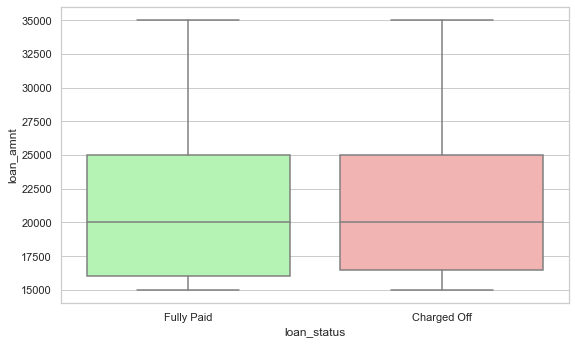

In [59]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_a75)
plt.show()

##### We observe the trend that higher the loan amount, the chances of Charged Off is more

We create a reusable function for univariate analysis of various columns

In [60]:
def PercentileC (*, data=loan, column, trailer=''):
    """
        Function Parameters:
            data : defaulted to 'loan'
            column : this is the continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values
                      like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [61]:
def Univariate_Categorical (*, data=loan, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order)
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

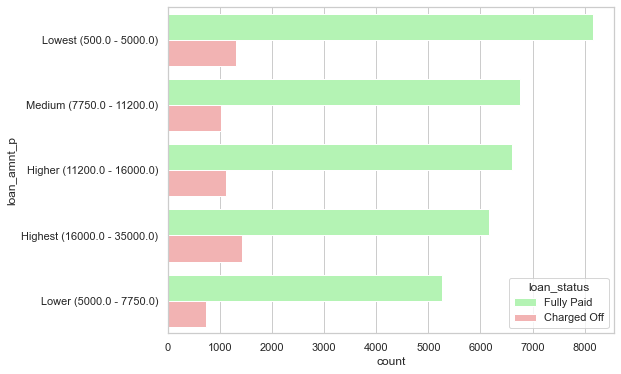

loan_amnt_p,Charged off %,Record count
Highest (16000.0 - 35000.0),0.187624,7579
Higher (11200.0 - 16000.0),0.145368,7739
Lowest (500.0 - 5000.0),0.138725,9472
Medium (7750.0 - 11200.0),0.131613,7788
Lower (5000.0 - 7750.0),0.123521,5999


In [62]:
PercentileC(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')

#### We observe that higher is the loan amount, the greater is the chance of loan default

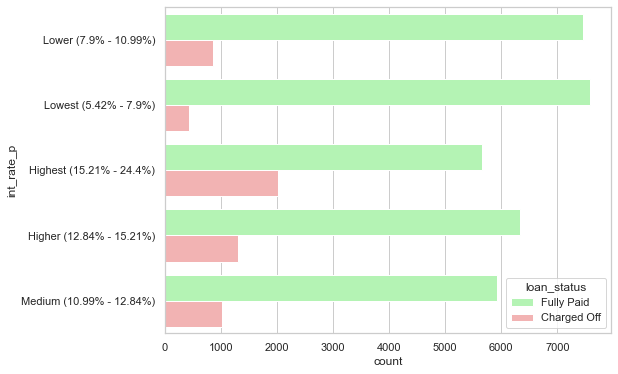

int_rate_p,Charged off %,Record count
Highest (15.21% - 24.4%),0.262150,7675
Higher (12.84% - 15.21%),0.171619,7639
Medium (10.99% - 12.84%),0.146995,6939
Lower (7.9% - 10.99%),0.102876,8311
Lowest (5.42% - 7.9%),0.053538,8013


In [63]:
PercentileC(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

#### We observe that higher is the interest, the greater is the chance of loan default

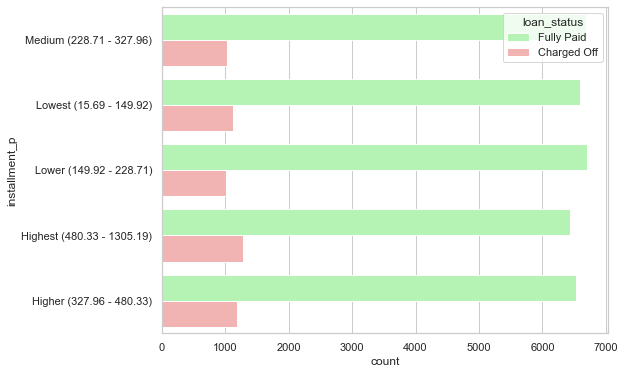

installment_p,Charged off %,Record count
Highest (480.33 - 1305.19),0.166321,7714
Higher (327.96 - 480.33),0.152988,7713
Lowest (15.69 - 149.92),0.145153,7716
Medium (228.71 - 327.96),0.132936,7718
Lower (149.92 - 228.71),0.131934,7716


In [64]:
PercentileC(column='installment')
Univariate_Categorical(column='installment_p')

#### We find that higher installment amounts show higher default percentages.

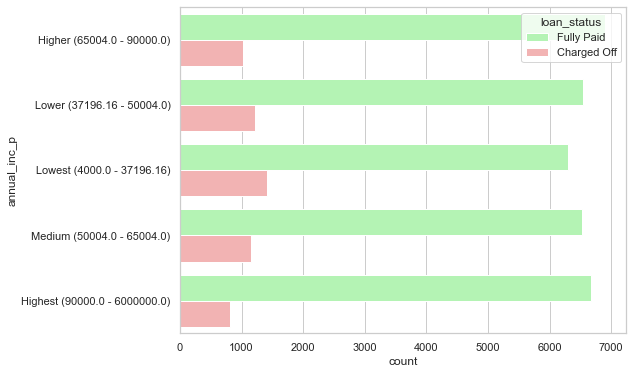

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37196.16),0.183126,7716
Lower (37196.16 - 50004.0),0.156926,7768
Medium (50004.0 - 65004.0),0.149629,7679
Higher (65004.0 - 90000.0),0.129651,7929
Highest (90000.0 - 6000000.0),0.109285,7485


In [65]:
PercentileC(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

#### We find that higher annual income show lesser default percentages.

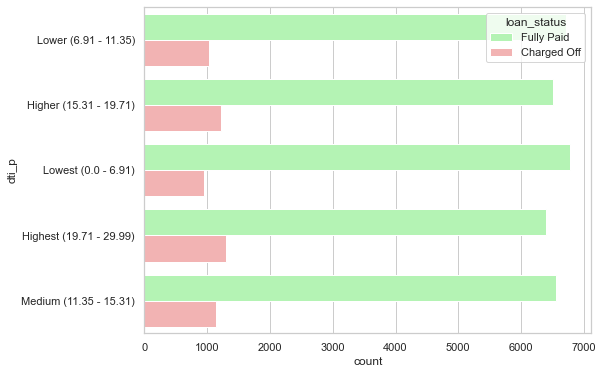

dti_p,Charged off %,Record count
Highest (19.71 - 29.99),0.168853,7699
Higher (15.31 - 19.71),0.157908,7726
Medium (11.35 - 15.31),0.147609,7696
Lower (6.91 - 11.35),0.132627,7736
Lowest (0.0 - 6.91),0.122409,7720


In [66]:
PercentileC(column='dti')
Univariate_Categorical(column='dti_p')

#### We find that higher debt to income ratio show higher default percentages

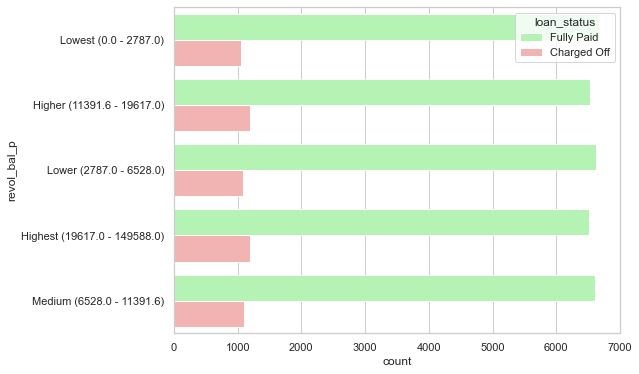

revol_bal_p,Charged off %,Record count
Highest (19617.0 - 149588.0),0.154913,7714
Higher (11391.6 - 19617.0),0.154335,7717
Medium (6528.0 - 11391.6),0.142894,7712
Lower (2787.0 - 6528.0),0.141283,7715
Lowest (0.0 - 2787.0),0.135898,7719


In [67]:
PercentileC(column='revol_bal')
Univariate_Categorical(column='revol_bal_p')

#### We find that total credit revolving balances slightly influence the default percentage. Higher the revolving balance, greater the chance of the loan getting defaulted.

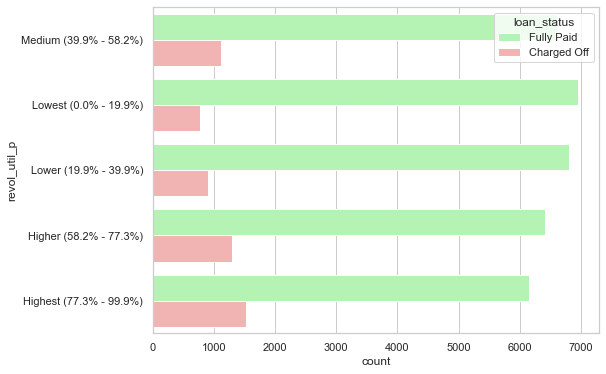

revol_util_p,Charged off %,Record count
Highest (77.3% - 99.9%),0.198069,7664
Higher (58.2% - 77.3%),0.167727,7703
Medium (39.9% - 58.2%),0.145001,7731
Lower (19.9% - 39.9%),0.118356,7714
Lowest (0.0% - 19.9%),0.099417,7715


In [68]:
PercentileC(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_p')

#### We observe that revolving line utilization rate has high impact to the loan default percentage. When this increases, the charged off percentage also increases.

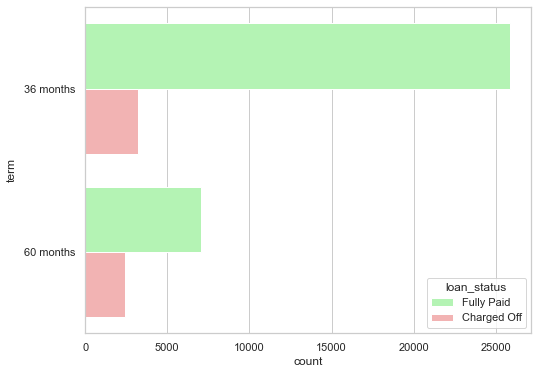

term,Charged off %,Record count
60 months,0.253138,9481
36 months,0.110909,29096


In [69]:
Univariate_Categorical(column='term')

#### For loans with 5 year repayment term, the default percent is 25%. And for 3 year loan repayment term, the default is only for 11% of the cases. Hence loan repayment term plays a factor in predicting the default rate.

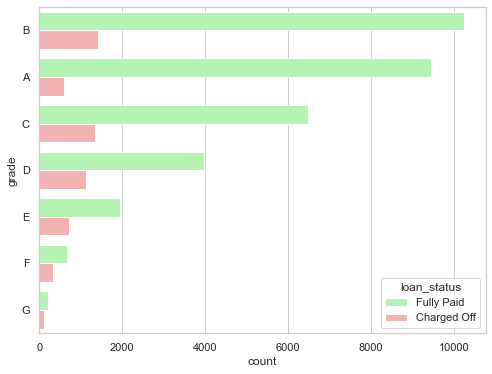

grade,Charged off %,Record count
G,0.337793,299
F,0.326844,976
E,0.268494,2663
D,0.219862,5085
C,0.171943,7834
B,0.122056,11675
A,0.059930,10045


In [70]:
Univariate_Categorical(column='grade')

#### We observe that for  G, F, E and D form grades, the default rate is much higher than others.

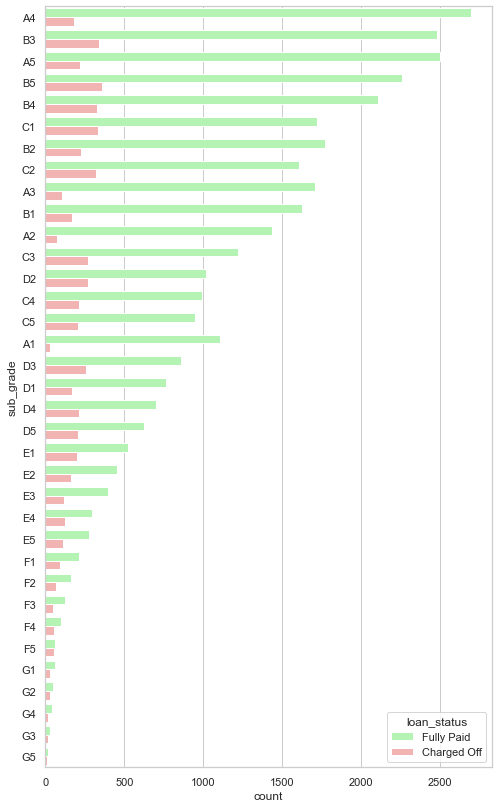

sub_grade,Charged off %,Record count
F5,0.477876,113
G3,0.422222,45
G2,0.363636,77
F4,0.350993,151
G5,0.344828,29
G1,0.329787,94
F2,0.300429,233
F1,0.298361,305
E4,0.297170,424
F3,0.293103,174


In [71]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))

#### We observe that the G3 and F5 sub grades have default rate greater than 40%. This field is a clear indicator of the default percent.

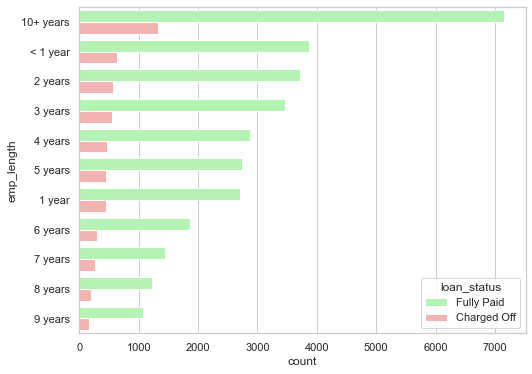

emp_length,Charged off %,Record count
10+ years,0.156810,8488
7 years,0.153711,1711
1 year,0.143894,3169
5 years,0.143394,3194
< 1 year,0.141748,4508
6 years,0.141605,2168
8 years,0.141463,1435
3 years,0.138335,4012
4 years,0.138241,3342
2 years,0.132137,4291


In [72]:
Univariate_Categorical(column='emp_length')

#### We are unable to infer any trend from this data

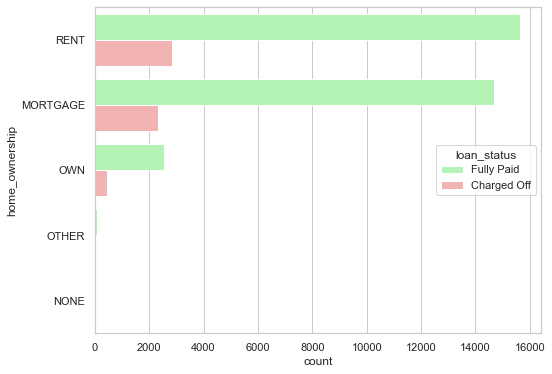

home_ownership,Charged off %,Record count
OTHER,0.183673,98
RENT,0.153626,18480
OWN,0.148908,2975
MORTGAGE,0.136713,17021


In [73]:
Univariate_Categorical(column='home_ownership')

#### We are unable to infer any trend from this data

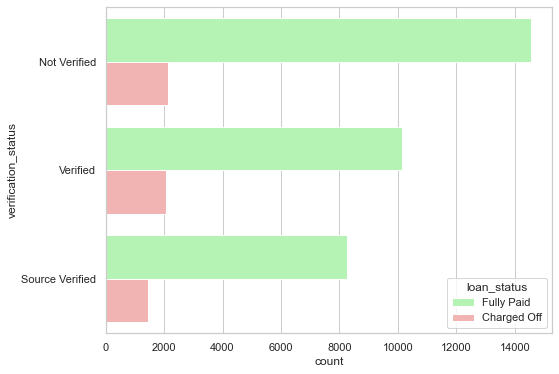

verification_status,Charged off %,Record count
Verified,0.168032,12206
Source Verified,0.148186,9677
Not Verified,0.128310,16694


In [74]:
Univariate_Categorical(column='verification_status')

#### We observe that Verified applicants have higher loan default percentage. Hence we infer that there is gap in the verification process

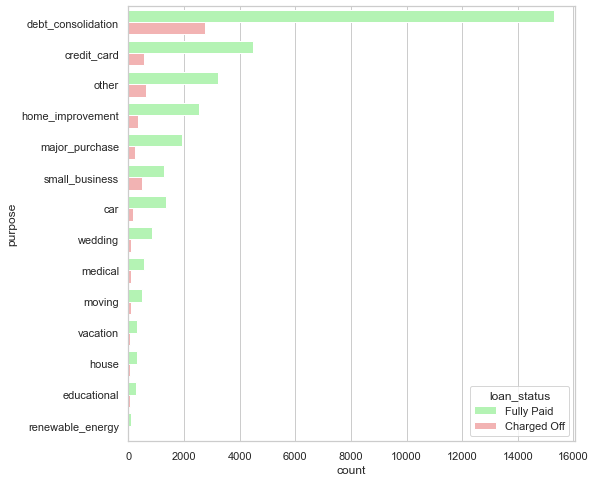

purpose,Charged off %,Record count
small_business,0.270810,1754
renewable_energy,0.186275,102
educational,0.172308,325
other,0.163777,3865
house,0.160763,367
moving,0.159722,576
medical,0.155653,681
debt_consolidation,0.153254,18055
vacation,0.141333,375
home_improvement,0.120696,2875


In [75]:
Univariate_Categorical(column='purpose', figsize=(8,8))

#### We observe that loans taken for small_business, renewable_energy and educational have higher risks associated with it in terms of loan default .

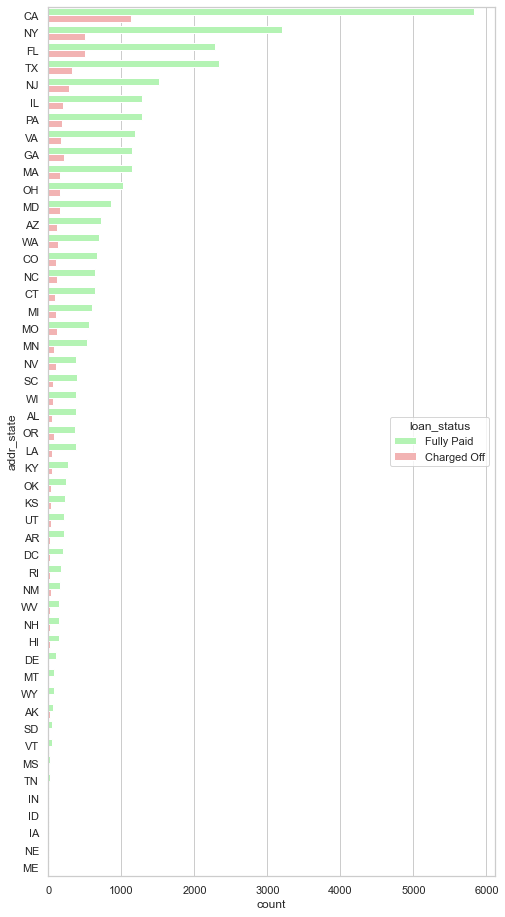

addr_state,Charged off %,Record count
NE,0.600000,5
NV,0.225470,479
SD,0.193548,62
AK,0.192308,78
FL,0.181230,2781
MO,0.170149,670
HI,0.168675,166
ID,0.166667,6
NM,0.163934,183
OR,0.163218,435


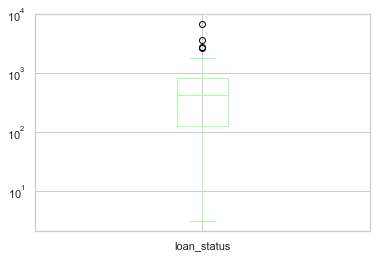

In [76]:
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)

#### We observe that NE, NV, SD, AK, FL, MO states show higher risks of loan default

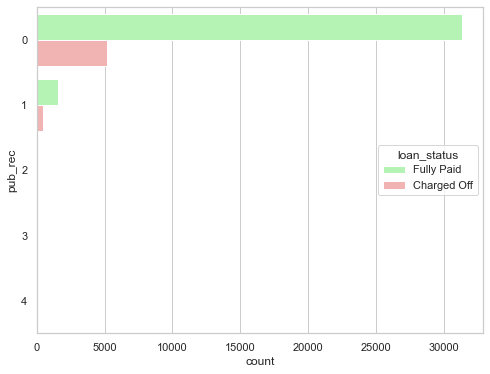

pub_rec,Charged off %,Record count
1,0.227024,2013
2,0.208333,48
0,0.141343,36507


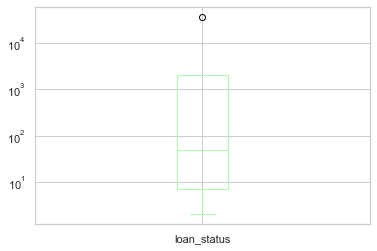

In [77]:
Univariate_Categorical(column='pub_rec', box_plot=True)

#### We observe that applicants with non-zero derogatory public records have greater chances of loan default

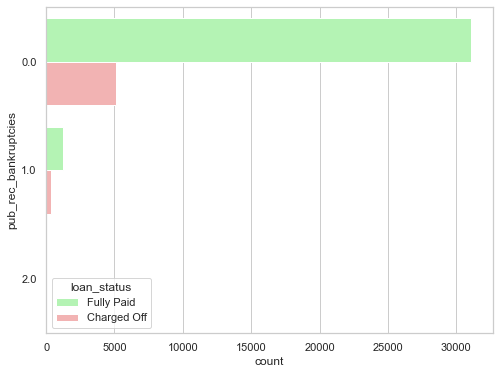

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.400000,5
1.0,0.223580,1637
0.0,0.141868,36238


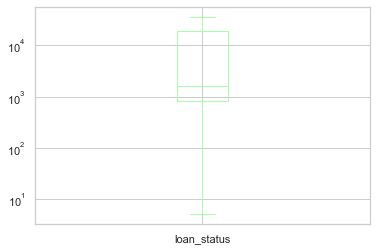

In [78]:
Univariate_Categorical(column='pub_rec_bankruptcies', box_plot=True)

#### We observe that higher is the number of public bankruptcy records, greater is the chance of loan default.

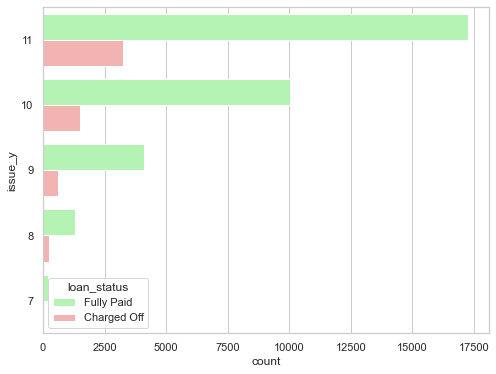

issue_y,Charged off %,Record count
7,0.179283,251
11,0.158705,20516
8,0.158131,1562
10,0.128772,11532
9,0.125954,4716


In [79]:
Univariate_Categorical(column='issue_y')

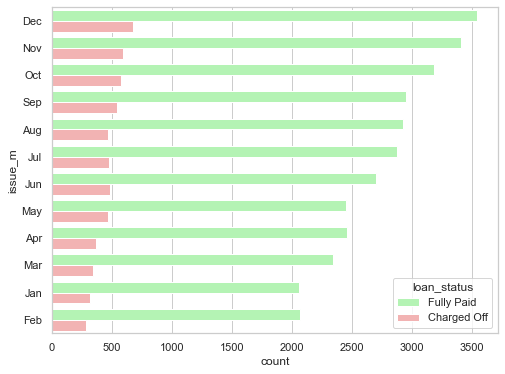

issue_m,Charged off %,Record count
Dec,0.160854,4215
May,0.159644,2919
Sep,0.156375,3498
Oct,0.154214,3761
Jun,0.151887,3180
Nov,0.149276,4006
Jul,0.142942,3351
Aug,0.138135,3388
Jan,0.134931,2379
Apr,0.130696,2831


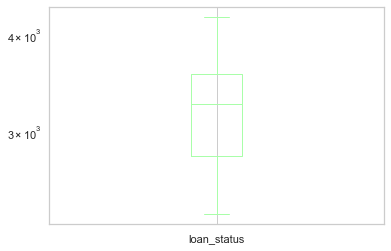

In [80]:
Univariate_Categorical(column='issue_m', box_plot=True)

#### We observe that  the December month  has the highest number of loan applications per year and also the biggest default ratio. This is festive season. Month of May is also another one, which is during the summer break and right before the Memorial day and Independence day breaks in US.

#### Bivariate Analysis

Now we will take group of variables together and analyze their combined effect on the loan-status. These categories are based on our business understanding. 

In [81]:
def Bivariate_Analysis (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Function Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, creates violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=data, x=x, y=y, hue=by, split=True, figsize=figsize,
                   ax=ax, hue_order=order)
    if title is not None:
        plt.title(title)
    plt.show()

In [82]:
def Bivariate_Categorical (*, data=loan, x, y, title=None, figsize=(8,6)):
    """
        Function Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, creates heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_num', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    if title is not None:
        plt.title(title)
    plt.show()

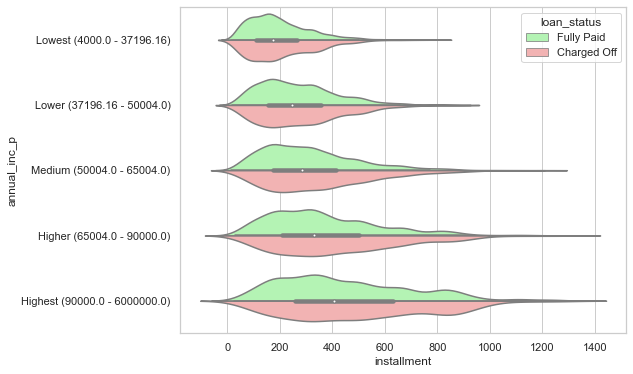

In [83]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

#### We clearly observe that higher installments for any income group have more number of loan defaults.

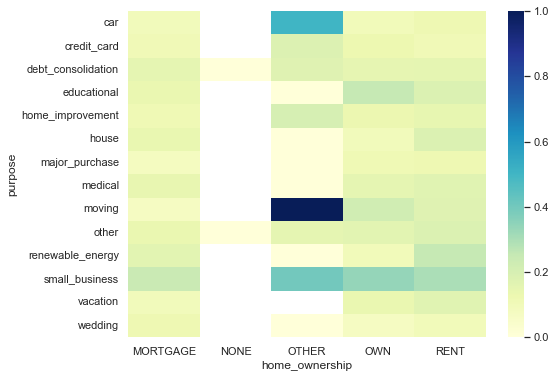

In [84]:
Bivariate_Categorical(x='home_ownership', y='purpose')

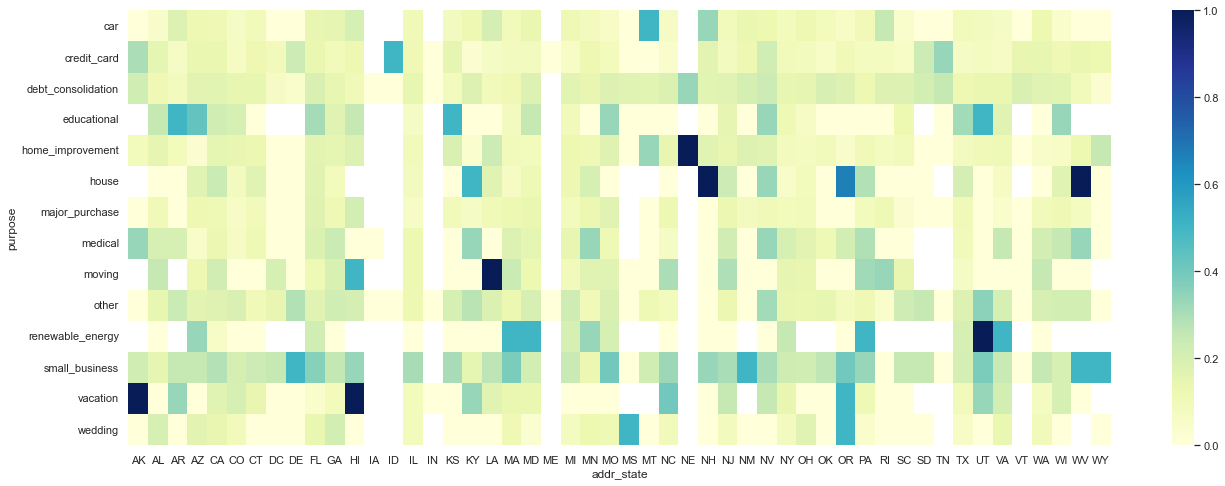

In [85]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

#### We observe that darker the intersection of addr_state has with the purpose of the loan, the greater is the chance of loan default.

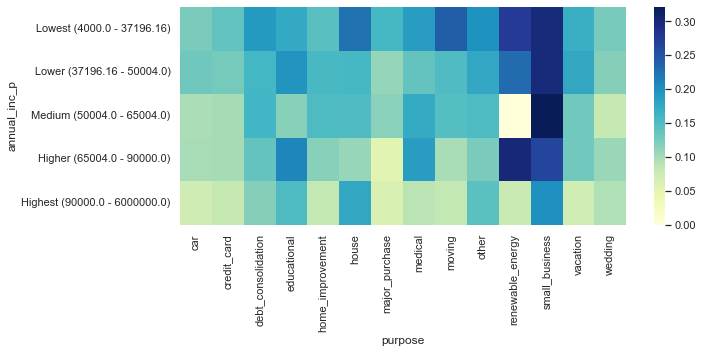

In [86]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))

#### By comparing the annual income with loan purpose we observe that small business loans for lowest and medium income groups have high chances of loan default. Also renewable energy loans for higher income group show the same trend 

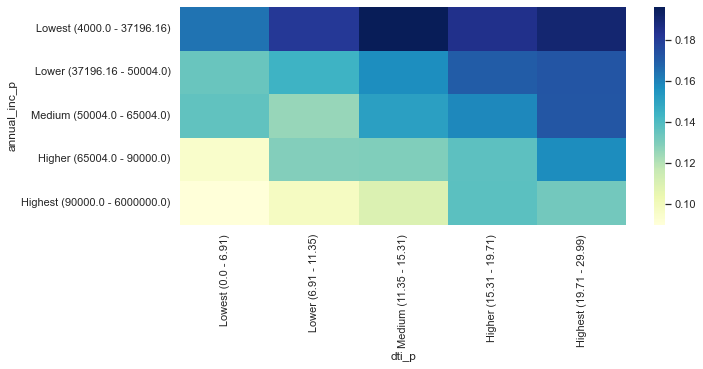

In [87]:
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

#### When we compare annual income with debt-to-income group, we observe that medium debt-to-income group in the lowest income range shows high trend of loan default

### Final Inference

After performing the Exploratory Data Analysis, we have categorized our results under 2 categories
1. Attributes showing lesser impact to the trend of loan default
2. Attributes showing higher impact to the trend of loan default

#### Lesser impact

-  Lower annual income (below 37000)
-  Higher loan amount (above 16000)
-  Higher debt to income ratio (above 15%)
-  Higher installment amount (above 327)
-  Loan issue month (Dec, May)
-  Applicant’s address state (NV, SD, AK, FL)

#### Higher impact

-  Higher interest rate (above 13%)
-  Repayment term (5 years)
-  Loan purpose (small business, renewable energy, educational)
-  Higher revolving line utilization rate (above 58%)
-  Loan grade & sub-grade (D to G)
-  Public bankruptcy records (1 or 2)
-  Derogatory public records (1 or 2)
-  Missing employment record

In terms of the effects of combined attributes on the tendency of loan default, we observe that the following show higher combined impact

-  High loan amount and interest rate for lower income group
-  High installment and longer repayment term
-  Residential state and loan purpose
-  Income group and loan purpose
-  Home ownership (other) and loan purpose (car, moving or small business)